In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


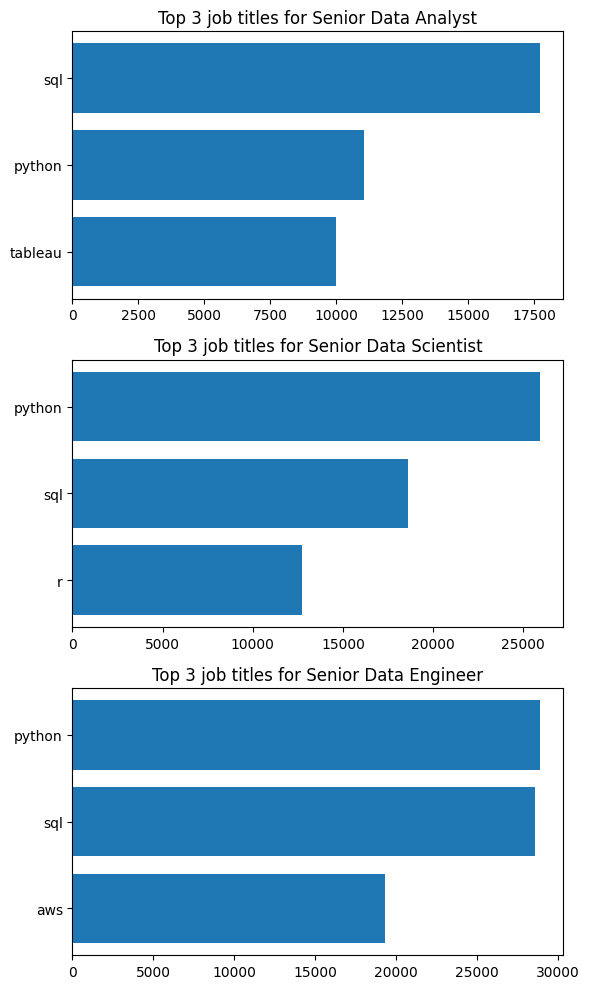

In [21]:
fig, axs = plt.subplots(3,1, figsize=(6,10))

job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
df_explode = df.explode('job_skills')
for i,role in enumerate(job_roles):
    df_roles = df_explode[df_explode['job_title_short'] == role]
    job_title = df_roles['job_skills'].value_counts().sort_values(ascending=False).head(3)
    axs[i].barh(job_title.index, job_title.values)
    axs[i].set_title(f'Top 3 job titles for {role}')
    axs[i].invert_yaxis()


fig.tight_layout()
plt.show()
